Original length of sample data is 4561
110 tests with Result, IPAddress, TotalScore = NaN dropped
Extra ip address dropped in 36 tests


<IPython.core.display.Javascript object>


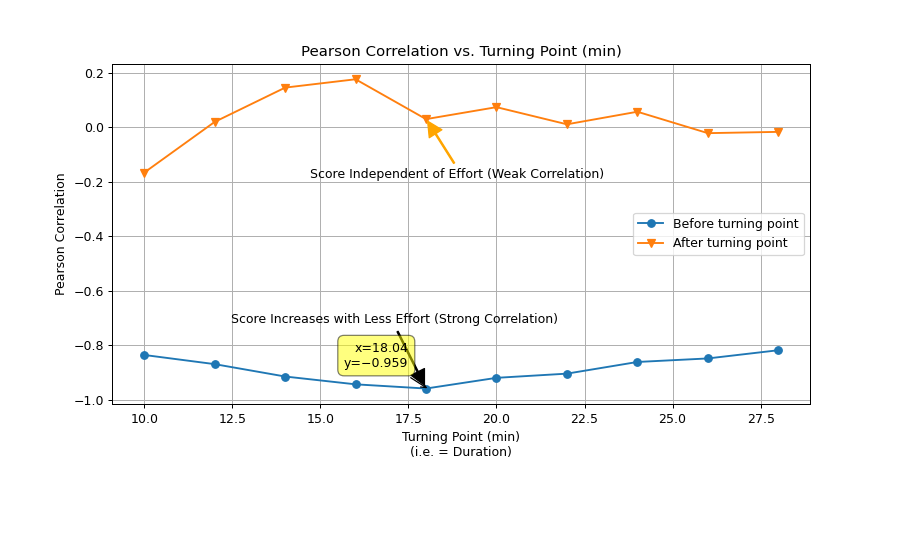

In [2]:
%matplotlib notebook
# Graph pearson coefficient for passing fraction vs turning points.
# Reason: The passing fraction below a turning point increases as the
# time to take the test deceases: reward increases with less effort (?).
# But, after the turning point reward is independent of effort.
# The turning point are a set of durations centered around 18 minutess.

import passing_fraction as pfs
from scipy.stats import pearsonr
import mplcursors
import matplotlib.pyplot as plt
import pandas as pd
import dmv_test_input

def calc_correlation(pf):
    cf = pd.DataFrame(np.arange(10, 30, 2), columns=["midpt"])

    dless = lambda x: pf[pf.duration <  x]
    dmore = lambda x: pf[pf.duration >= x]

    cbefore = lambda x: pearsonr(dless(x).duration, dless(x).fraction)[0]
    cafter  = lambda x: pearsonr(dmore(x).duration, dmore(x).fraction)[0]

    cf["before_midpt"] = cf.midpt.apply(cbefore)
    cf["after_midpt"]  = cf.midpt.apply(cafter)
    return cf

def plot_correlation_midpoints(df):
    fig, ax = plt.subplots()

    plt.plot(df.midpt, df.before_midpt, "-o")
    plt.plot(df.midpt, df.after_midpt, "-v")
    
    mplcursors.cursor(hover=True)
    fig.set_size_inches(10, 6)
    fig.subplots_adjust(bottom=.25)
    ax.set_title("Pearson Correlation vs. Turning Point (min)")
    ax.set_xlabel("Turning Point (min)\n(i.e. = Duration)")
    ax.set_ylabel("Pearson Correlation")
    ax.legend(["Before turning point", "After turning point"])
    
    ax.annotate("Score Increases with Less Effort (Strong Correlation)",
                xy = (18, -.959), xycoords='data',
                xytext=(-25, 50), textcoords='offset points',
                arrowprops=dict(width=1, facecolor='black', shrink=0.05),
                horizontalalignment='center', verticalalignment='bottom'
               )
    ax.annotate("Score Independent of Effort (Weak Correlation)",
                xy = (18, .031), xycoords='data',
                xytext=(+25, -50), textcoords='offset points',
                arrowprops=dict(width=1, facecolor='orange', edgecolor="orange", shrink=0.05),
                horizontalalignment='center', verticalalignment='bottom'
               )
    plt.grid(visible=True)
    plt.show()
    
def main():
    df, risk = dmv_test_input.dmv_risk_input()

    limits = pfs.duration_intervals(lo=2.8, hi=40., inc=0.5)
    pf = pfs.passing_fraction(df, limits)  

    cf = calc_correlation(pf)
    cf.head()
    plot_correlation_midpoints(cf)
if __name__ == '__main__':
    main()